In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

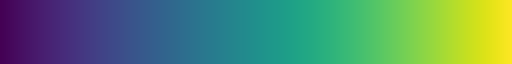

In [194]:
# Setting up the seaborn color paletee.
sns.color_palette("viridis", as_cmap=True)

## Reading the dataset.

In [2]:
file1 = pd.read_csv('https://raw.githubusercontent.com/sakshisinghal936/eda_data_science_course/main/AB_NYC_2019.csv')

## Understanding the dataset.

In [3]:
file1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
file1.tail()

id                                              name  host_id  \
48901  5441                   Central Manhattan/near Broadway     7989   
48902  5803    Lovely Room 1, Garden, Best Area, Legal rental     9744   
48903  6021  Wonderful Guest Bedroom in Manhattan for SINGLES    11528   
48904  6090                     West Village Nest - Superhost    11975   
48905  6848                  Only 2 stops to Manhattan studio    15991   

           host_name neighbourhood_group    neighbourhood  latitude  \
48901           Kate           Manhattan   Hell's Kitchen  40.76076   
48902         Laurie            Brooklyn      South Slope  40.66829   
48903        Claudio           Manhattan  Upper West Side  40.79826   
48904          Alina           Manhattan     West Village  40.73530   
48905  Allen & Irina            Brooklyn     Williamsburg  40.70837   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48901  -73.98867     Private room     85               2                188   
48902  -73.98779     Private room     89               4                167   
48903  -73.96113     Private room     85               2                113   
48904  -74.00525  Entire home/apt    120              90                 27   
48905  -73.95352  Entire home/apt    140               2                148   

      last_review  reviews_per_month  calculated_host_listings_count  \
48901  23-06-2019               1.50                               1   
48902  24-06-2019               1.34                               3   
48903  05-07-2019               0.91                               1   
48904  31-10-2018               0.22                               1   
48905  29-06-2019               1.20                               1   

       availability_365  
48901                39  
48902               314  
48903               333  
48904                 0  
48905                46

In [5]:
file1.sample(10)

id                                               name    host_id  \
5425    3924397                  Quiet Location with two balconies   20329737   
32159  25137887                        Beach front Dublex near jfk  187383058   
3978    2479193                       Chic New York city apartment    7974574   
44131  34059931  1 BR Large Luxury Furnished Ap. Near Central Park   15145088   
45229  34618352                                      King's Airbnb  261167972   
9937    7647651                      Private Bedroom in Large Loft    6072700   
1921     846829                Private room in the lower east side     395609   
17757  13935511    Great Appartment with cool roomates in Bushwick    6169992   
30145  23252588    No place like Brooklyn.  No place like Red Hook    2536555   
46893  35481361        Prospect Park Hostel- Male Long Term Stay-3  179478172   

        host_name neighbourhood_group       neighbourhood  latitude  \
5425   Aleksandra            Brooklyn        Williamsburg  40.71267   
32159        John              Queens             Arverne  40.58809   
3978       Vanita           Manhattan            Kips Bay  40.74400   
44131         Izi           Manhattan     Upper West Side  40.78537   
45229       Roger            Brooklyn  Bedford-Stuyvesant  40.68366   
9937         Adam            Brooklyn            Red Hook  40.67791   
1921           Jb           Manhattan     Lower East Side  40.71275   
17757   Geraldine            Brooklyn        Williamsburg  40.70282   
30145      Julian            Brooklyn            Red Hook  40.67914   
46893   Elizabeth            Brooklyn            Flatbush  40.65175   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
5425   -73.95721  Entire home/apt    190               2                  4   
32159  -73.79387  Entire home/apt    450               2                 32   
3978   -73.98054  Entire home/apt    152             270                  5   
44131  -73.97456  Entire home/apt    190              30                  0   
45229  -73.92011  Entire home/apt    180               2                  9   
9937   -74.00720     Private room     55               5                  5   
1921   -73.98682     Private room     95               1                  7   
17757  -73.94287     Private room     60               1                  0   
30145  -74.00630  Entire home/apt    125               3                  1   
46893  -73.96208      Shared room     25              10                  1   

      last_review  reviews_per_month  calculated_host_listings_count  \
5425   29-09-2015               0.08                               1   
32159  07-07-2019               2.35                               2   
3978   06-01-2016               0.10                               1   
44131         NaN                NaN                               8   
45229  07-07-2019               5.40                               1   
9937   22-06-2019               0.10                               1   
1921   15-08-2015               0.12                               1   
17757         NaN                NaN                               1   
30145  31-12-2018               0.16                               1   
46893  15-06-2019               1.00                               3   

       availability_365  
5425                  0  
32159               315  
3978                  0  
44131               157  
45229               330  
9937                  0  
1921                  0  
17757                 0  
30145                 0  
46893               299

#### Data Cleaning.

In [6]:
### Finding Duplicate Rows.

file1.duplicated().sum()

11

In [7]:
### Removing the duplicate rows.

file1.drop_duplicates(inplace = True)

In [8]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843

In [9]:
### Let's check for the null values.

file1.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
file1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [11]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(file1):
    # Replace missing values with the most common value of each column in: 'last_review'
    file1 = file1.fillna({'last_review': file1['last_review'].mode()[0]})
    # Replace missing values with the mean of each column in: 'reviews_per_month'
    file1 = file1.fillna({'reviews_per_month': file1['reviews_per_month'].mean()})
    # Drop rows with missing data across all columns
    file1 = file1.dropna()
    return file1

file1 = clean_data(file1.copy())
file1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0  23-06-2019   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.373221                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

## Dropping the unnecessary Columns.

In [12]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(file1):
    # Drop columns: 'latitude', 'longitude'
    file1 = file1.drop(columns=['latitude', 'longitude'])
    return file1

file1 = clean_data(file1.copy())
file1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood        room_type  price  \
0         John            Brooklyn    Kensington     Private room    149   
1     Jennifer           Manhattan       Midtown  Entire home/apt    225   
2    Elisabeth           Manhattan        Harlem     Private room    150   
3  LisaRoxanne            Brooklyn  Clinton Hill  Entire home/apt     89   
4        Laura           Manhattan   East Harlem  Entire home/apt     80   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  19-10-2018           0.210000   
1               1                 45  21-05-2019           0.380000   
2               3                  0  23-06-2019           1.373221   
3               1                270  05-07-2019           4.640000   
4              10                  9  19-11-2018           0.100000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

## EDA

In [13]:
file1.describe()

id       host_id         price  minimum_nights  \
count  4.885800e+04  4.885800e+04  48858.000000    48858.000000   
mean   1.902335e+07  6.763169e+07    152.740309        7.012444   
std    1.098289e+07  7.862389e+07    240.232386       20.019757   
min    2.539000e+03  2.438000e+03      0.000000        1.000000   
25%    9.475980e+06  7.818669e+06     69.000000        1.000000   
50%    1.969114e+07  3.079133e+07    106.000000        3.000000   
75%    2.915765e+07  1.074344e+08    175.000000        5.000000   
max    3.648724e+07  2.743213e+08  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48858.000000       48858.000000                    48858.000000   
mean           23.273098           1.373228                        7.148369   
std            44.549898           1.497816                       32.964600   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.280000                        1.000000   
50%             5.000000           1.220000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48858.000000  
mean         112.801425  
std          131.610962  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [14]:
## Let's find the unique values.

file1.nunique()

id                                48858
name                              47875
host_id                           37425
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
room_type                             3
price                               674
minimum_nights                      108
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [15]:
file1['name'].nunique()

47875

In [16]:
file1['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: count, dtype: int64

In [17]:
file1['neighbourhood_group'].value_counts(normalize=True) * 100 # percentages of the negihbourhood groups

neighbourhood_group
Manhattan        44.297761
Brooklyn         41.117115
Queens           11.592779
Bronx             2.228908
Staten Island     0.763437
Name: proportion, dtype: float64

In [18]:
file_1 = file1['neighbourhood'].value_counts().reset_index()

In [19]:
file_1[file_1['count'] > 1000]

neighbourhood  count
0         Williamsburg   3917
1   Bedford-Stuyvesant   3713
2               Harlem   2655
3             Bushwick   2462
4      Upper West Side   1969
5       Hell's Kitchen   1954
6         East Village   1852
7      Upper East Side   1797
8        Crown Heights   1563
9              Midtown   1545
10         East Harlem   1116
11          Greenpoint   1113
12             Chelsea   1112

In [20]:
file1['price'].value_counts(bins = 5)

(-10.001, 2000.0]    48772
(2000.0, 4000.0]        54
(4000.0, 6000.0]        16
(6000.0, 8000.0]         9
(8000.0, 10000.0]        7
Name: count, dtype: int64

In [27]:
file1['id'] = file1['id'].astype('str')
file1['host_id'] = file1['host_id'].astype('str')

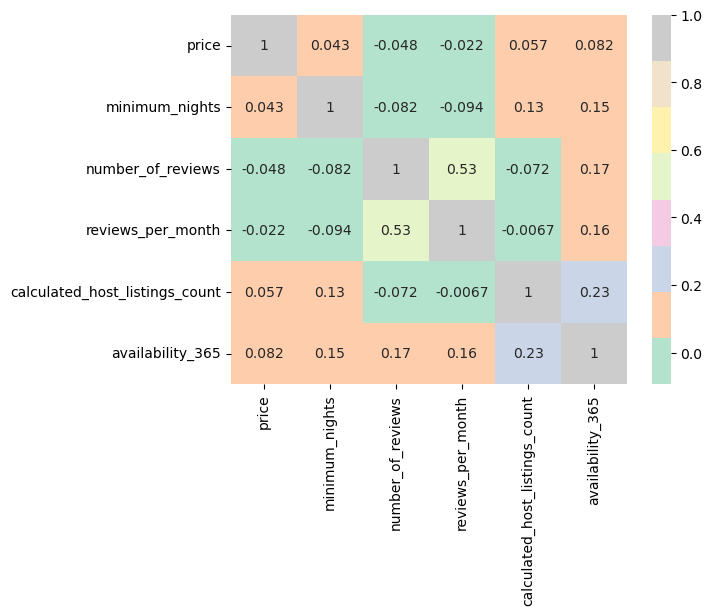

In [31]:



file1.corr(numeric_only=True)
sns.heatmap(file1.corr(numeric_only=True), annot = True, cmap = 'Pastel2')
plt.show()

In [23]:
import ydata_profiling as yp

In [24]:
yp.ProfileReport(file1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

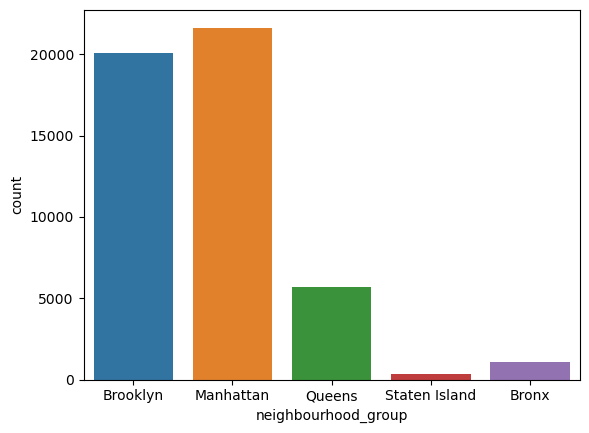

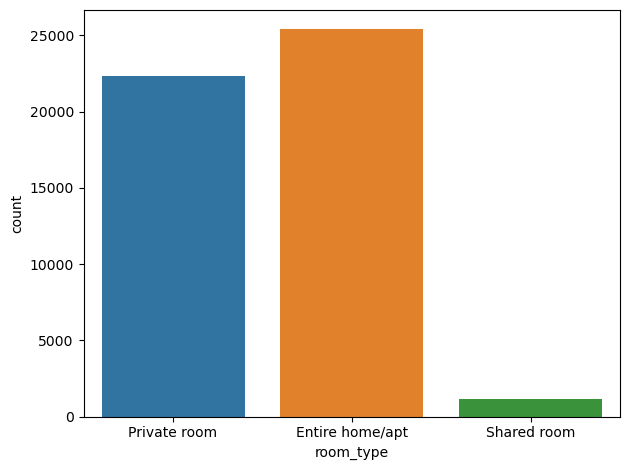

In [38]:
### Graphical Analysis


# Bar Graph
sns.countplot(x = 'neighbourhood_group', data = file1, hue = 'neighbourhood_group')
plt.show()

sns.countplot(x = 'room_type', data = file1, hue = 'room_type')


plt.tight_layout()
plt.show()


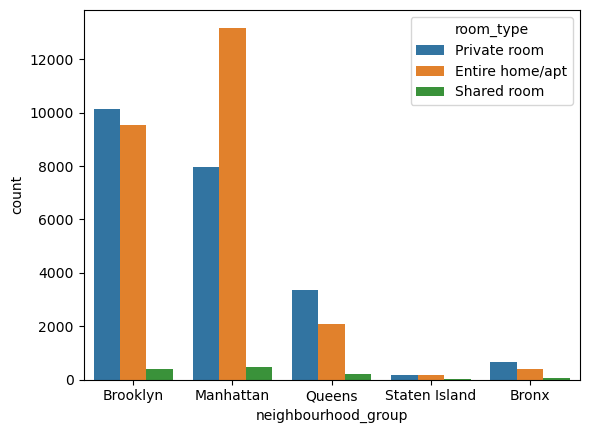

In [46]:
sns.countplot(x = file1['neighbourhood_group'], hue = file1['room_type'])
sns.color_palette('tab10')
plt.show()

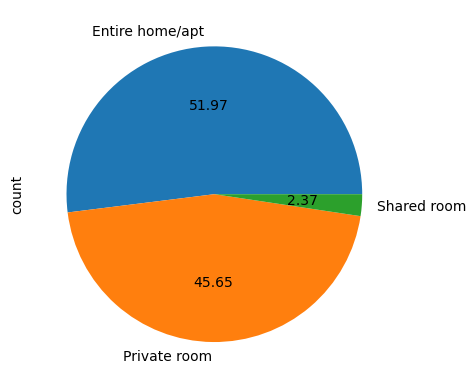

In [70]:
file1['room_type'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.show()

In [71]:
df = sns.load_dataset('titanic')

In [72]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

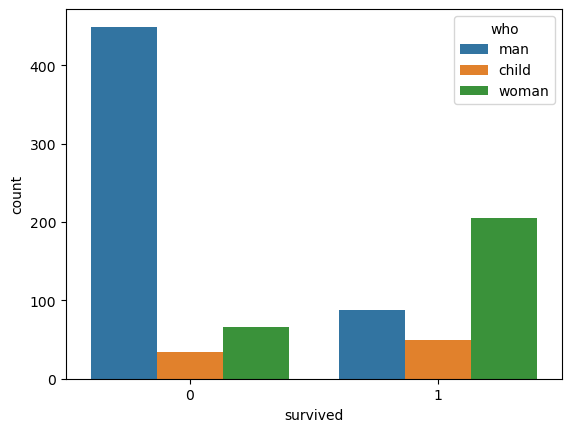

In [80]:
sns.countplot(x = 'survived', data = df, hue = 'who')
plt.show()

### Numerical Columns

<Axes: xlabel='price', ylabel='Count'>

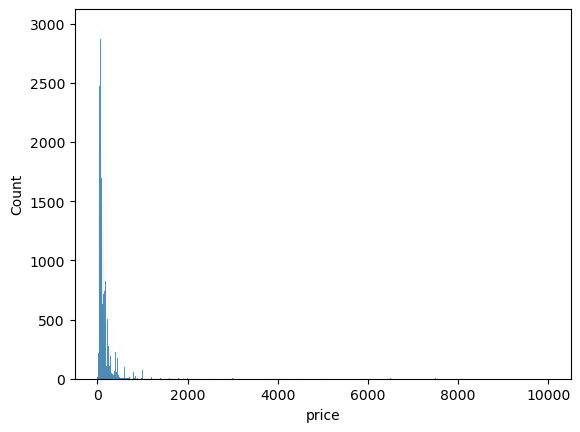

In [81]:
# Histograms


sns.histplot(x = 'price', data = file1)
plt.show()

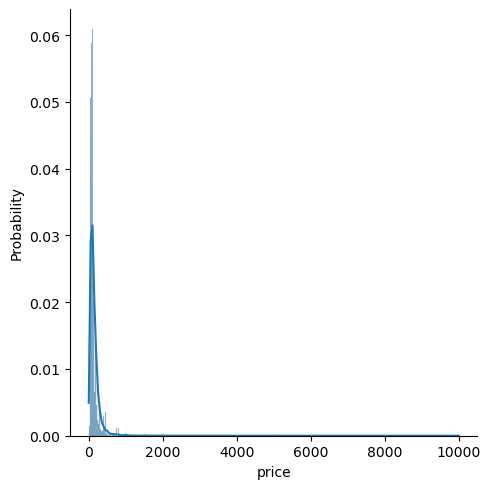

In [92]:
sns.displot(x = 'price',data = file1 , kde = True, stat = 'probability')
plt.show()

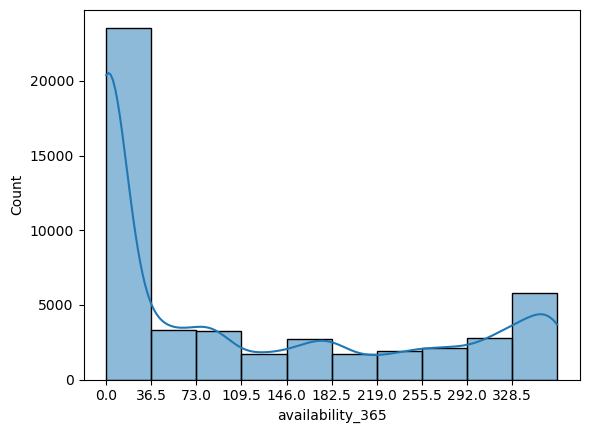

In [116]:
sns.histplot(x = 'availability_365', data = file1, kde = True, bins = 10)
plt.xticks(np.arange(0 , 351, 36.5))
plt.show()

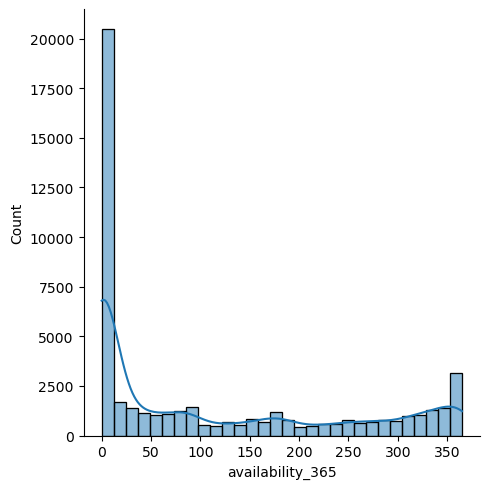

In [124]:
sns.displot(x = 'availability_365', data = file1, kde = True)
sns.color_palette('Blues')
plt.show()

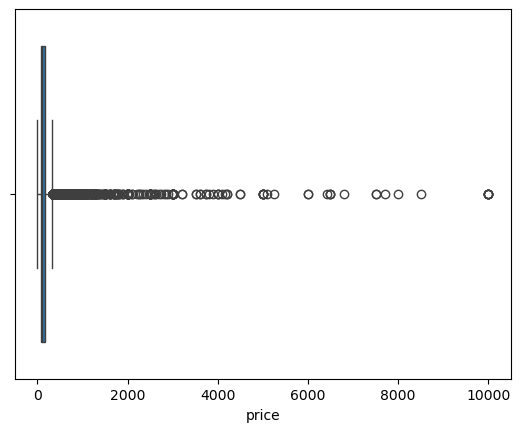

In [130]:
### Boxplots in the data set.

sns.boxplot(x= 'price', data = file1)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

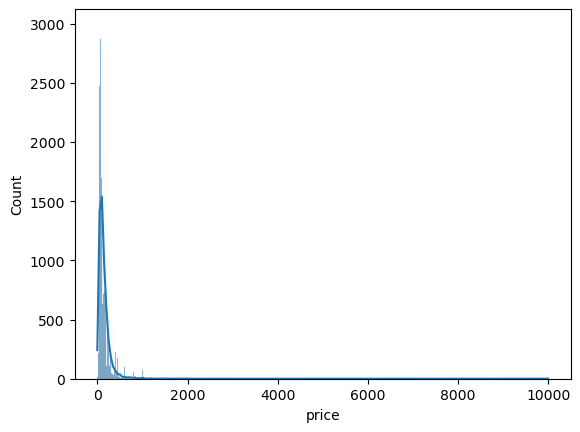

In [129]:
sns.histplot(x = 'price', data = file1, kde = True)

In [133]:
df2 = sns.load_dataset('titanic')

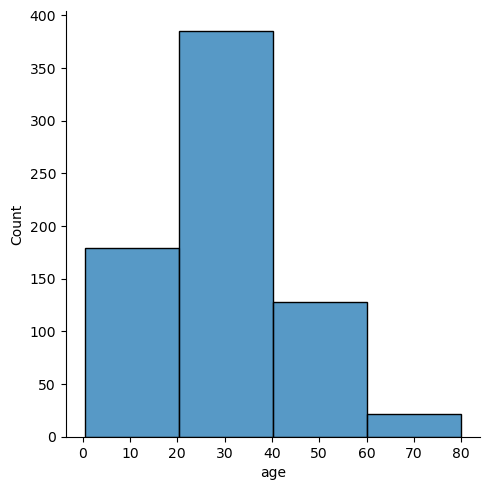

In [141]:
sns.displot(x = 'age', data = df2, bins = 4)


plt.show()

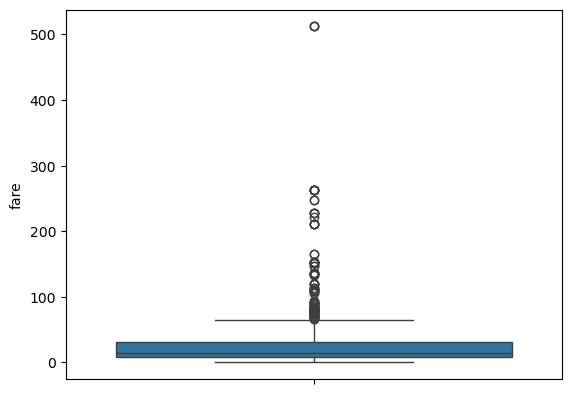

In [156]:
sns.boxplot(y = 'fare', data = df2)
plt.show()

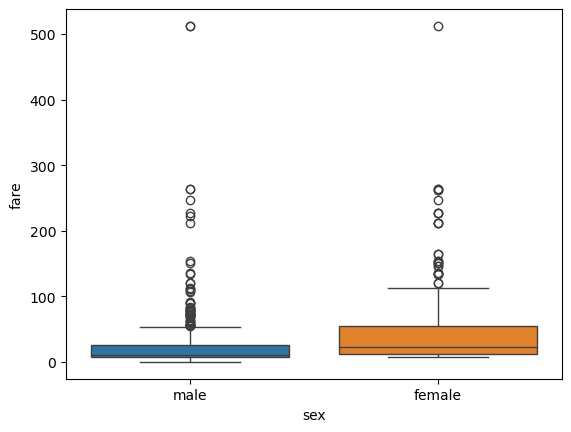

In [153]:
sns.boxplot(x = 'sex', y = 'fare', data = df2, hue = 'sex')
plt.show()

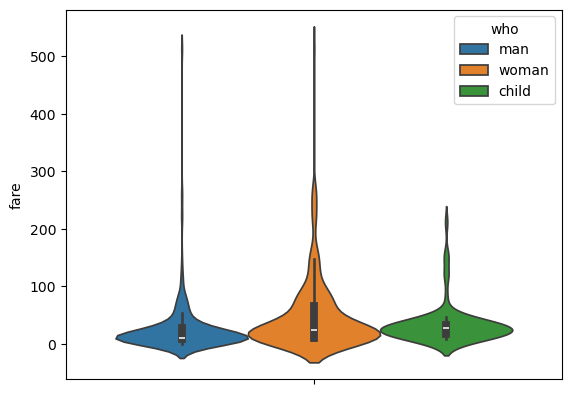

In [165]:
sns.violinplot(y = 'fare', data = df2, hue = 'who')
plt.show()

### BiVariate Analysis.

In [166]:
file1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [167]:
file1.select_dtypes(include = ['number']).columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

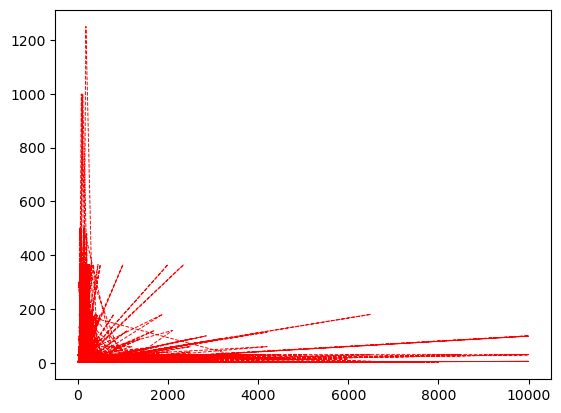

In [173]:
# Let's plot a graph against price and minimum nights.

plt.plot(file1['price'], file1['minimum_nights'], label = 'First plot', color = 'red', linewidth = 0.7, linestyle = 'dashed')
plt.show()

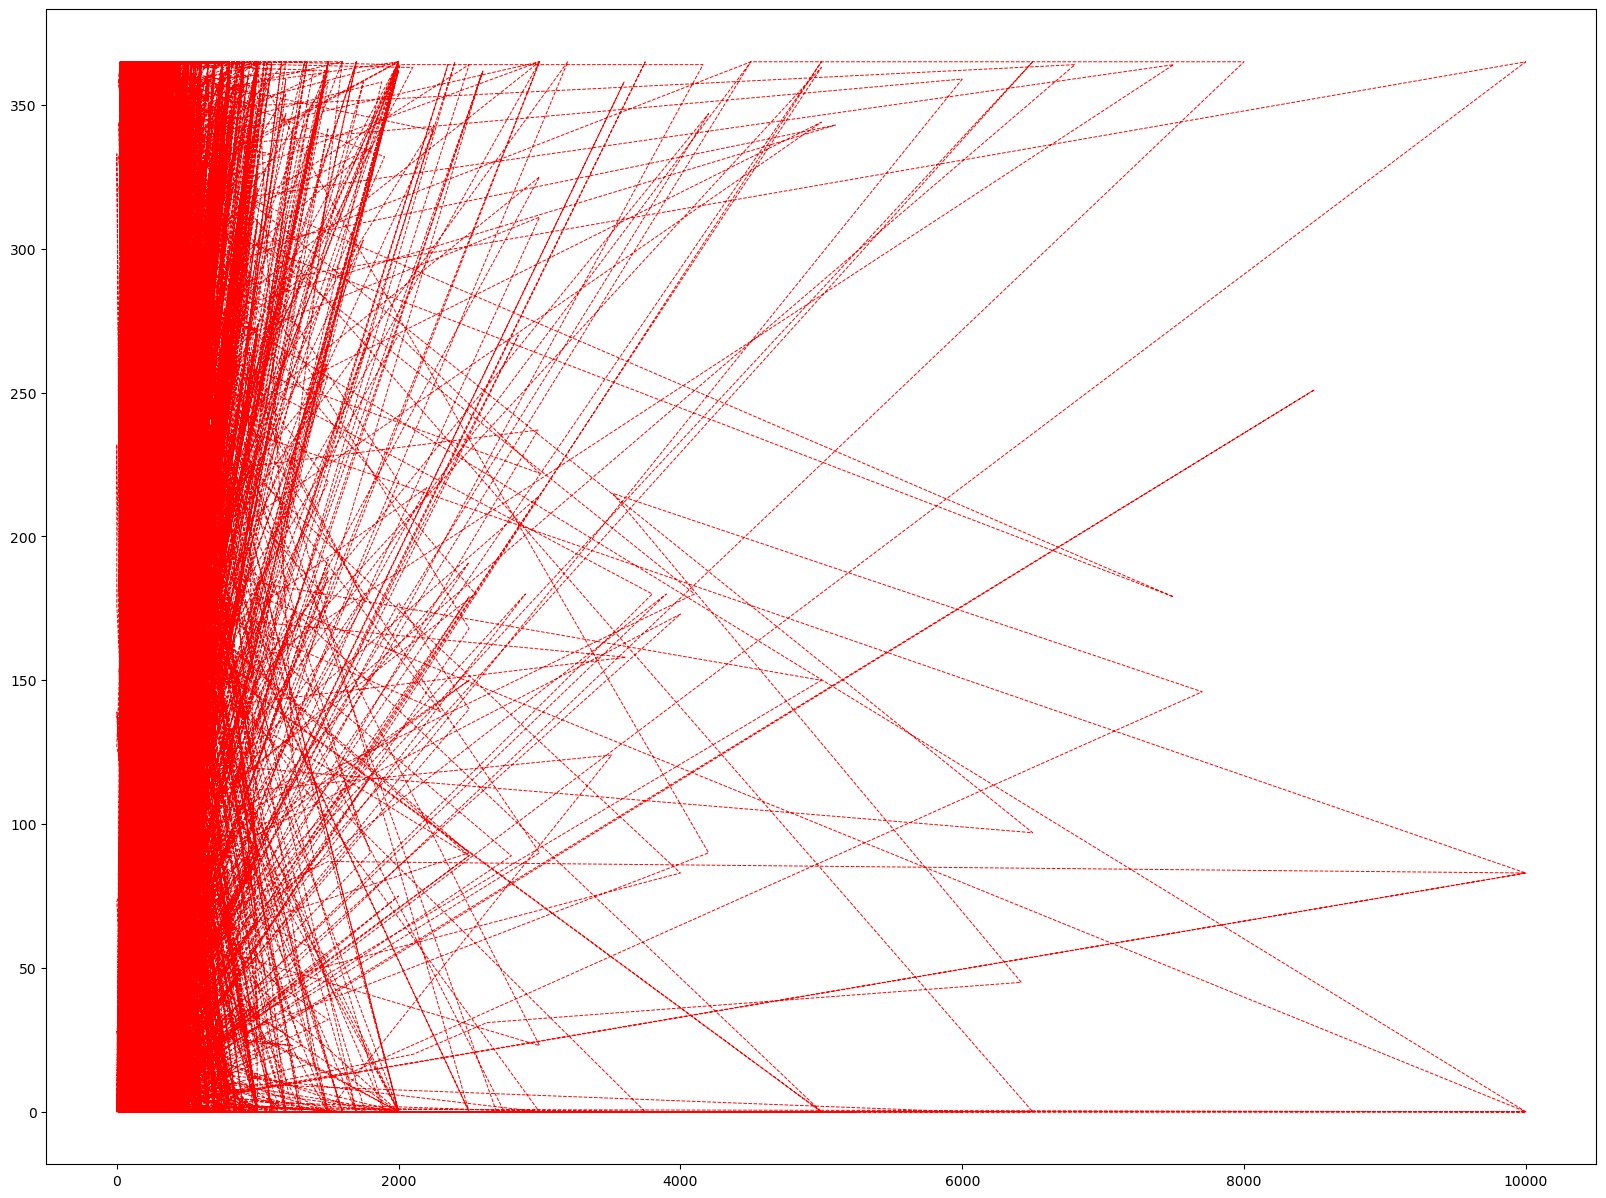

In [176]:
fig = plt.figure(figsize=(20,15))
plt.plot(file1['price'], file1['availability_365'], label = 'First plot', color = 'red', linewidth = 0.7, linestyle = 'dashed')
plt.show()

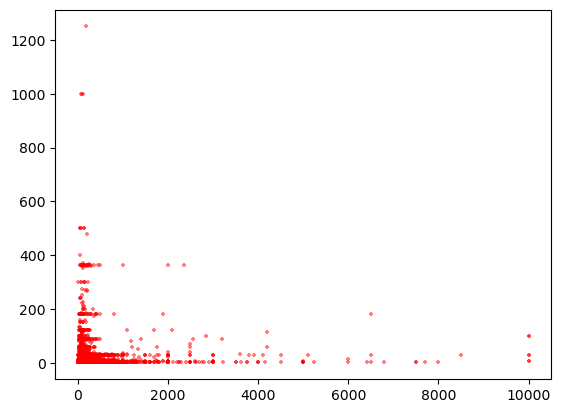

In [181]:
plt.scatter(file1['price'], file1['minimum_nights'], label = 'First plot', color = 'red', marker = '+', s=10, alpha = 0.5)
plt.show()

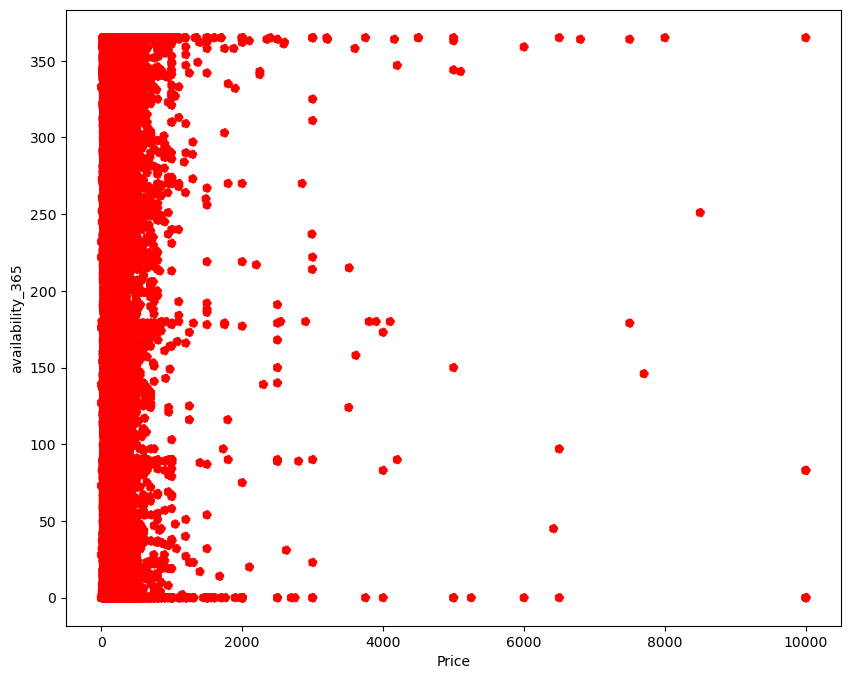

In [184]:
fig = plt.figure(figsize=(10,8))
plt.scatter(file1['price'], file1['availability_365'], label = 'First plot', color = 'red', linewidth = 0.7, linestyle = 'dashed')
plt.xlabel('Price')
plt.ylabel('availability_365')
plt.show()

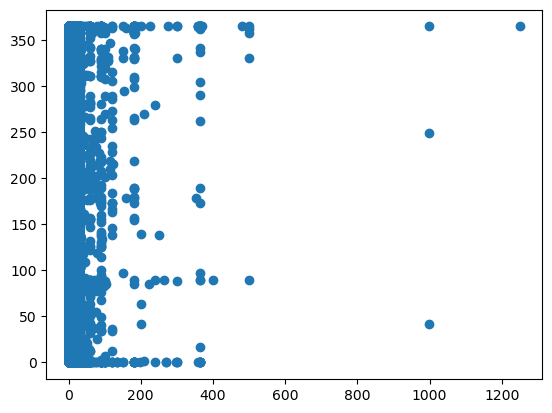

In [185]:
 plt.scatter(file1['minimum_nights'], file1['availability_365'])
 plt.show()

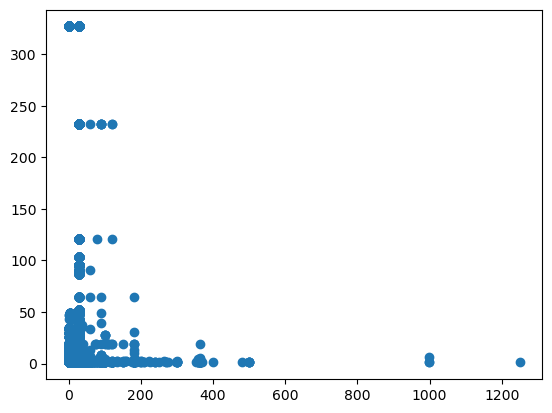

In [186]:
 plt.scatter(file1['minimum_nights'], file1['calculated_host_listings_count'])
 plt.show()

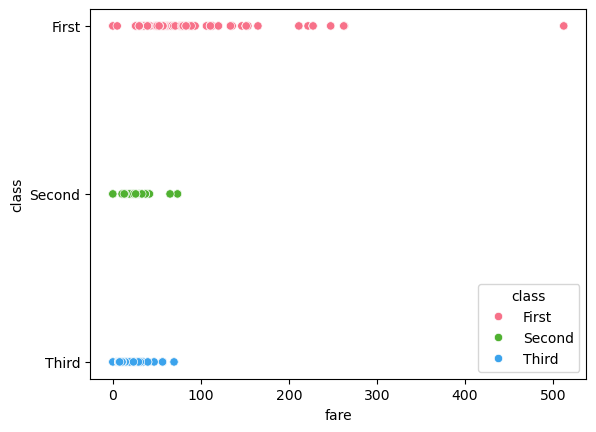

In [244]:
# Let's do some analaysis on the titanic data set.

sns.scatterplot(x = 'fare', y = 'class', data = df2, hue = 'class', palette = 'husl')
sns.color_palette("viridis")
plt.show()


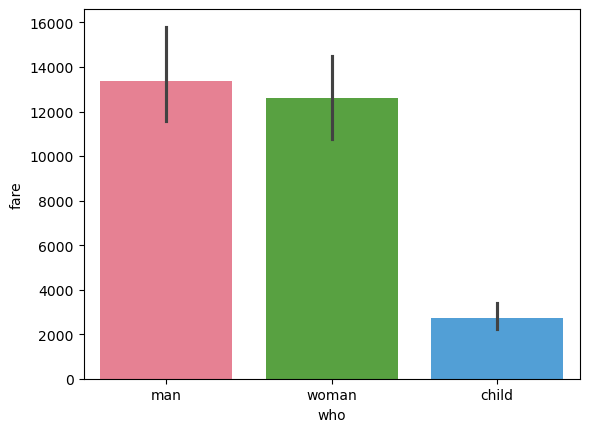

In [204]:
sns.barplot(x='who', y='fare', data=df2, estimator='sum', hue = 'who', palette='husl')
plt.show()

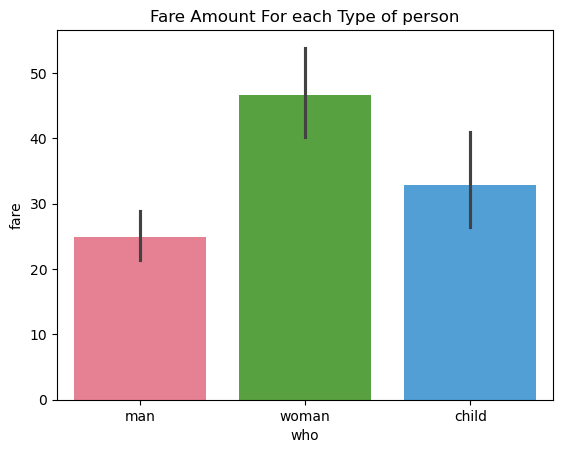

In [208]:
sns.barplot(x='who', y='fare', data=df2, estimator='mean', hue = 'who', palette='husl')
plt.title("Fare Amount For each Type of person")
plt.show()

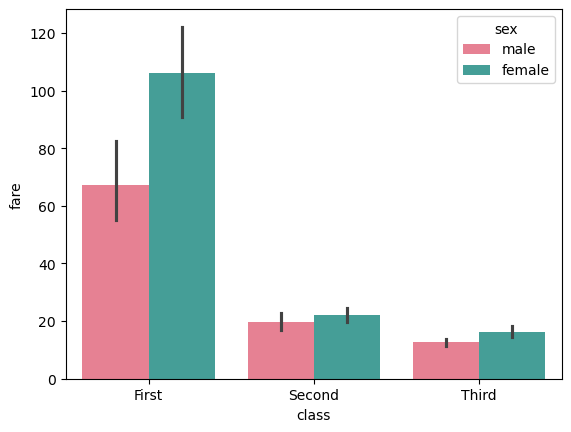

In [213]:
sns.barplot(x='class', y='fare', data=df2, estimator='mean', hue = 'sex', palette='husl')
plt.show()

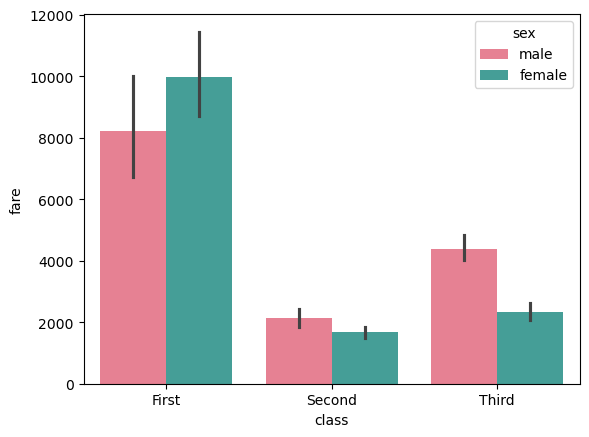

In [242]:
sns.barplot(x='class', y='fare', data=df2, estimator='sum', hue = 'sex', palette='husl')
plt.show()

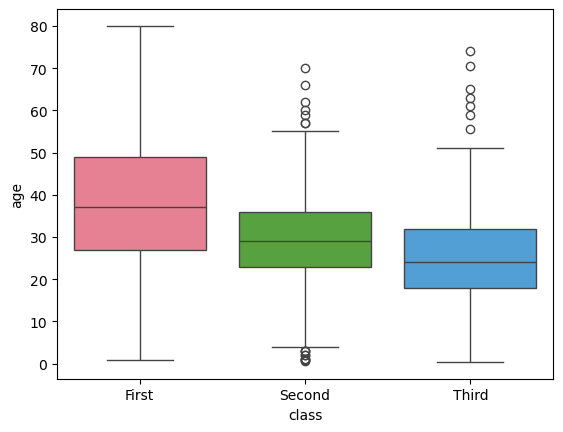

In [217]:
sns.boxplot(x='class', y='age', data=df2, hue = 'class' ,palette='husl')
plt.show()

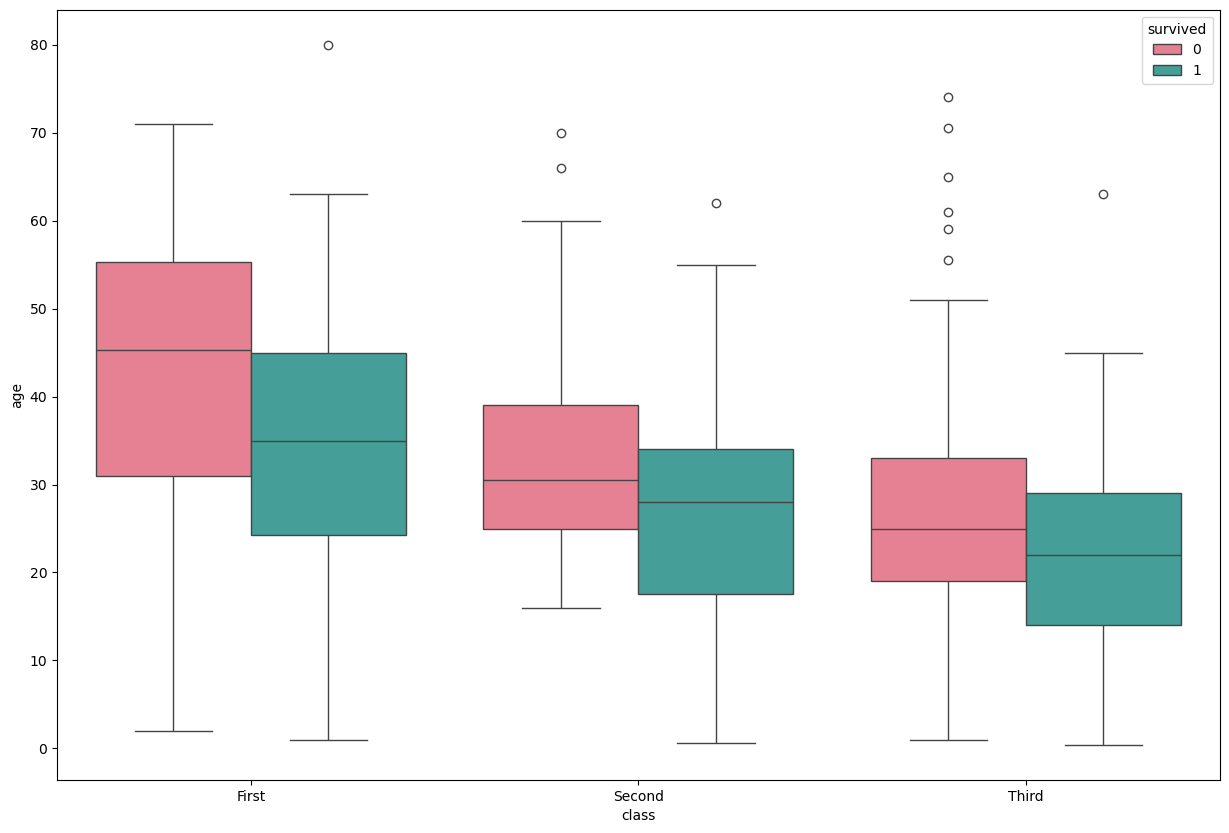

In [220]:
fig = plt.figure(figsize = (15,10))

sns.boxplot(x='class', y='age', data=df2, hue = 'survived' ,palette='husl')
plt.show()

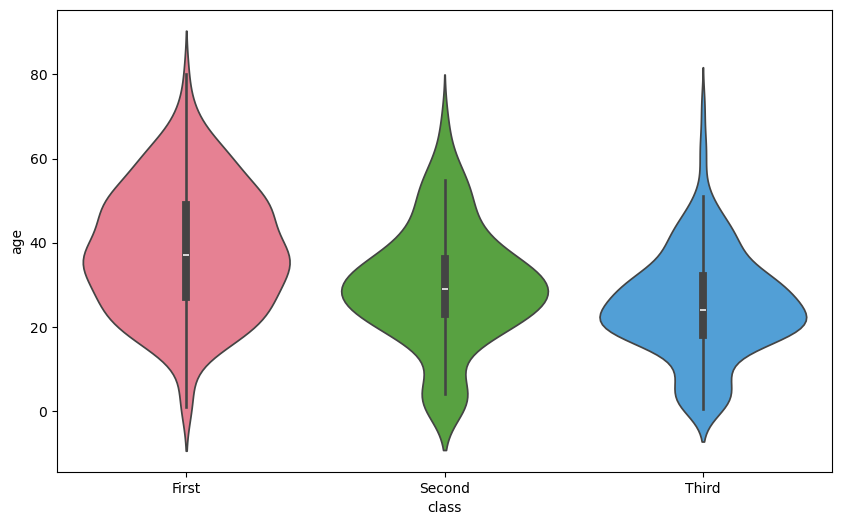

In [227]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x='class', y='age', data=df2, hue = 'class' ,palette='husl')
plt.show()

#### Bivariate Visualizations (Categorical)

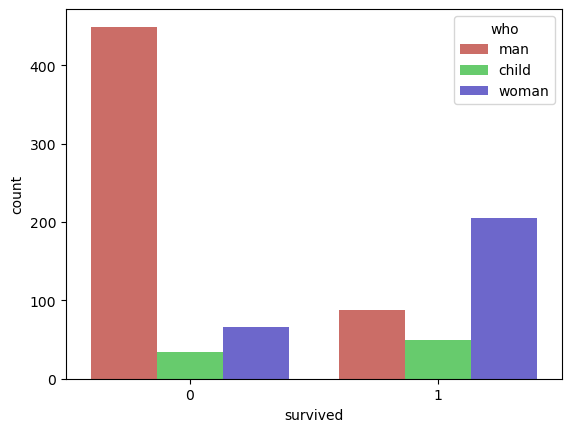

In [234]:
sns.countplot(x = 'survived', data = df2, hue = 'who', palette='hls')
plt.show()

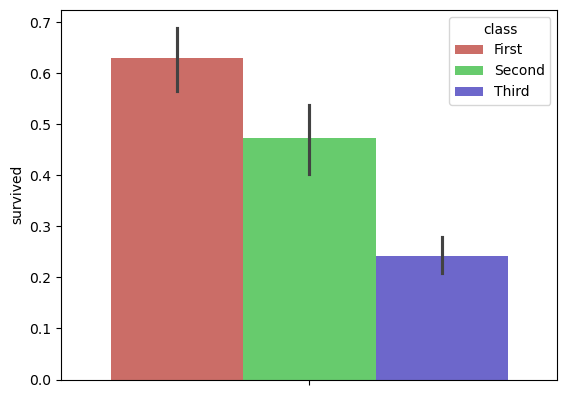

In [241]:
sns.barplot(y = 'survived', data = df2, hue = 'class', palette='hls')
plt.show()

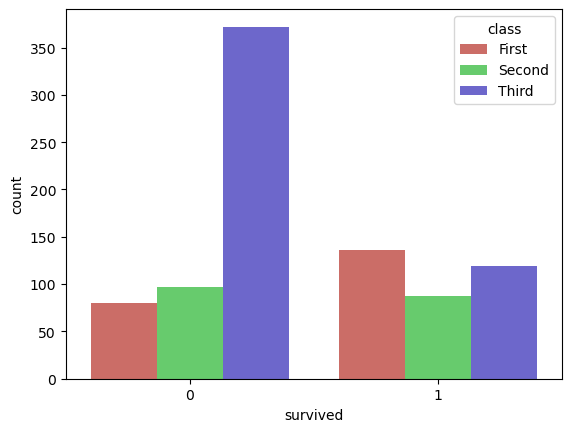

In [247]:
sns.countplot( x= 'survived', data = df2, hue = 'class', palette = 'hls')
plt.show()

In [250]:
x = pd.crosstab(df2['who'], df2['class'])

In [251]:
x

class  First  Second  Third
who                        
child      6      19     58
man      119      99    319
woman     91      66    114

In [269]:
df2.groupby([df2['class'], df2['who']], observed = True).apply(lambda x: x['who'].count())

class   who  
First   child      6
        man      119
        woman     91
Second  child     19
        man       99
        woman     66
Third   child     58
        man      319
        woman    114
dtype: int64

<Axes: xlabel='class', ylabel='who'>

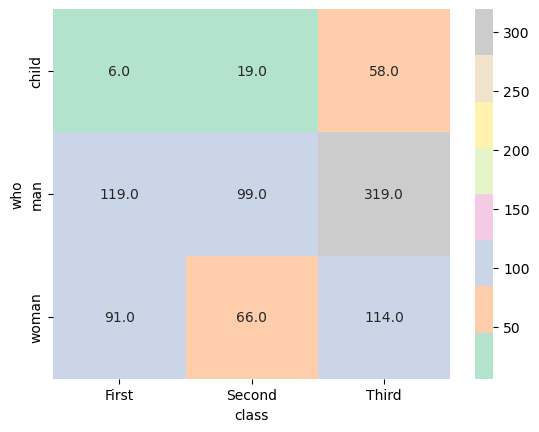

In [295]:
sns.heatmap(x, cmap = 'Pastel2', annot = True, fmt = '.1f')

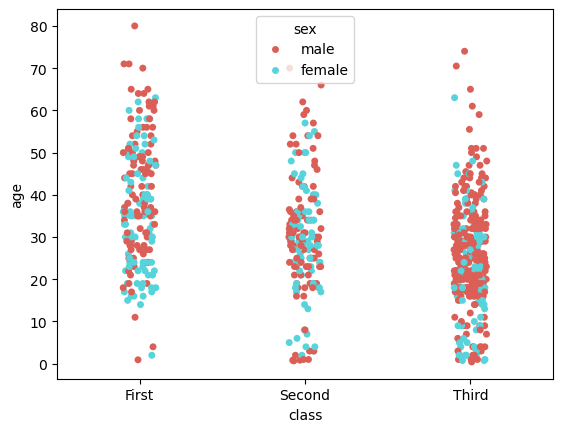

In [275]:
sns.stripplot(x = 'class', y = 'age', hue = 'sex', data = df2, palette = 'hls')
plt.show()

In [277]:
df3 = sns.load_dataset('iris')

In [278]:
df3.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

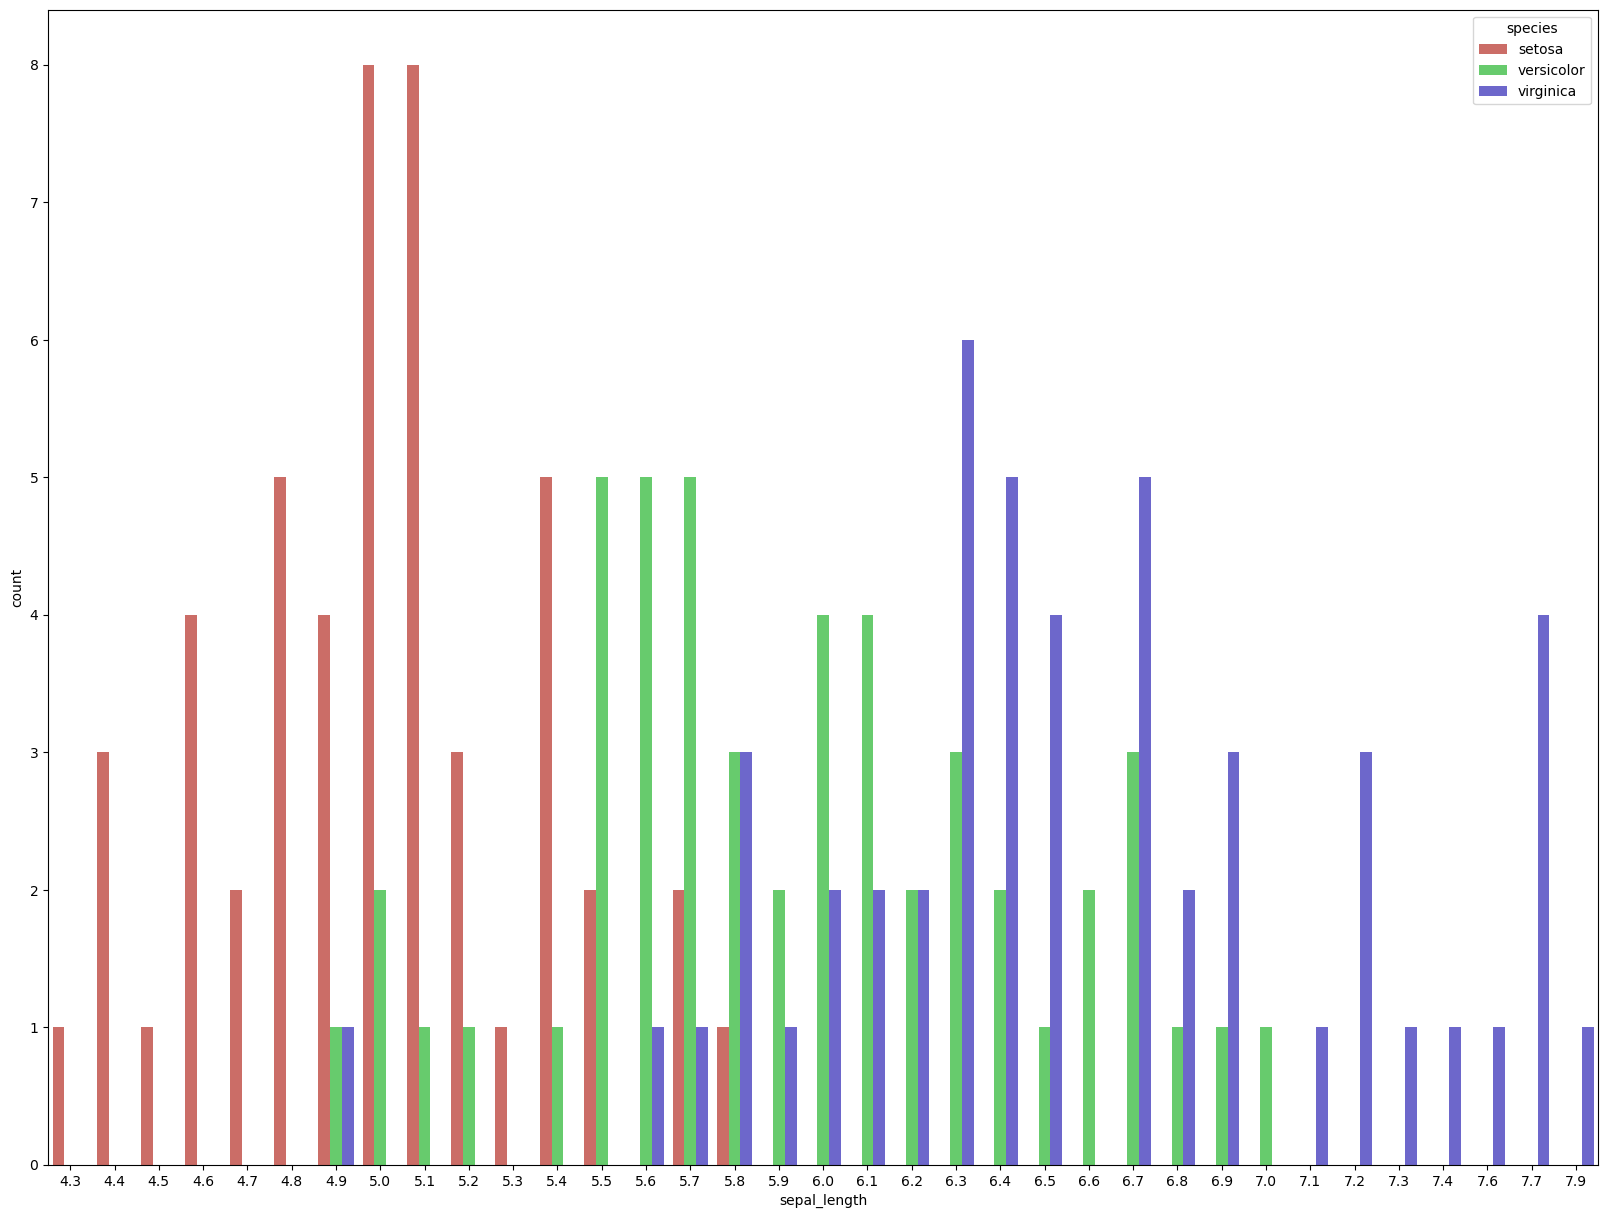

In [290]:

fig = plt.figure(figsize=(20,15))

sns.countplot(x = 'sepal_length', data = df3, hue = 'species', palette = 'hls')
Tplt.show()

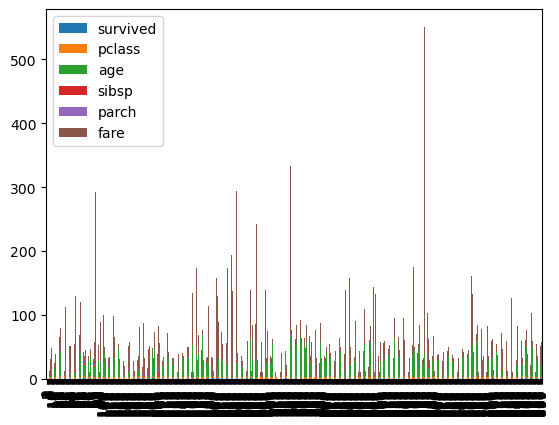

In [291]:
df2.plot(kind = 'bar', stacked = True)
plt.show()

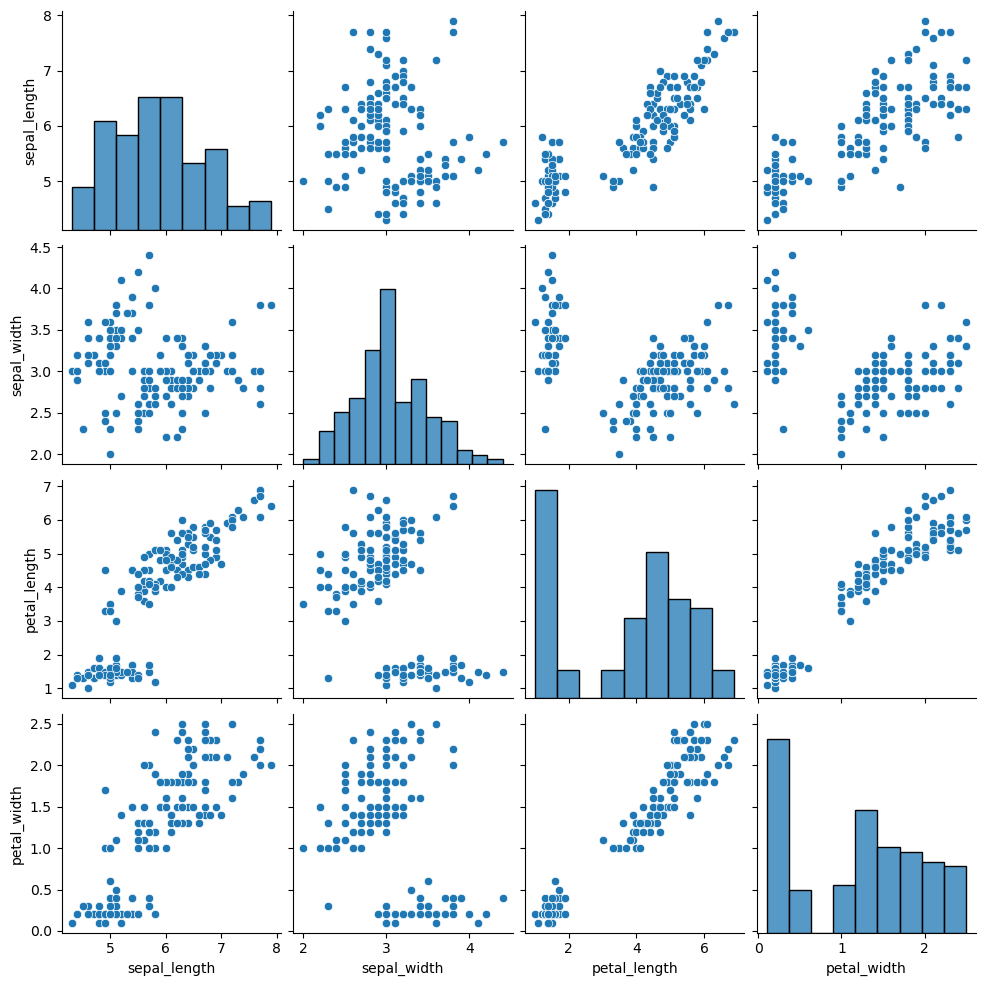

In [292]:
sns.pairplot(df3)
plt.show()

<Axes: xlabel='age', ylabel='fare'>

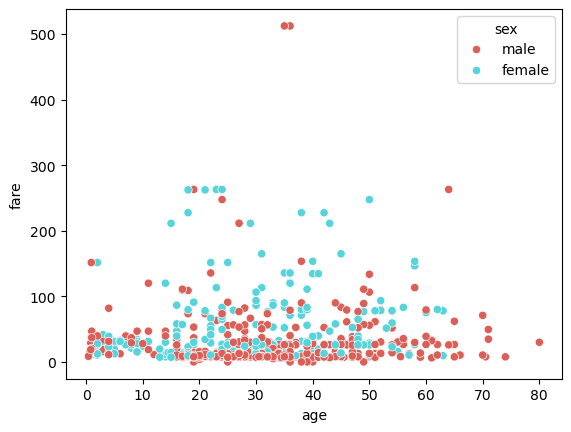

In [299]:
### BiVariate Data Visualizatio (Numerical)

sns.scatterplot(x = 'age', y = 'fare', data = df2, hue = 'sex', palette = 'hls')

In [301]:
df4 = sns.load_dataset('tips')

In [302]:
df4.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Axes: xlabel='smoker', ylabel='count'>

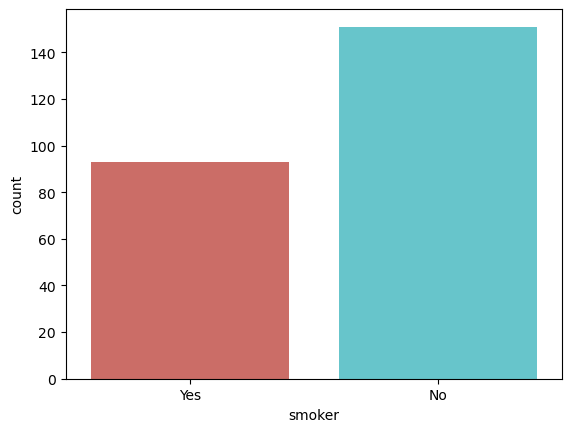

In [304]:
sns.countplot(x = 'smoker', data = df4, hue = 'smoker', palette = 'hls')

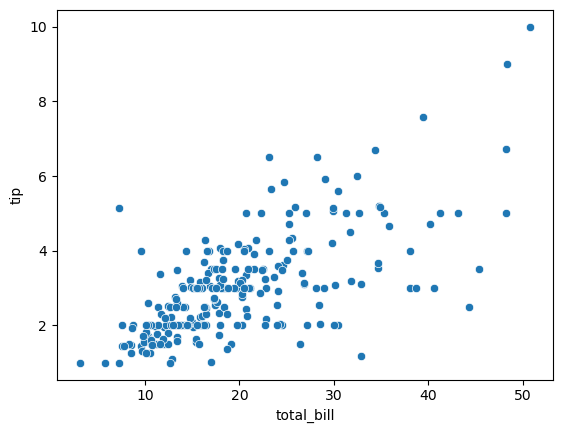

In [306]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df4)
plt.show()

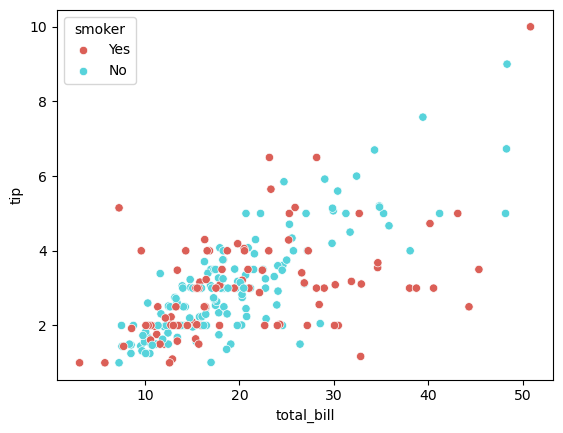

In [310]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df4, hue = 'smoker', palette = 'hls')
plt.show()

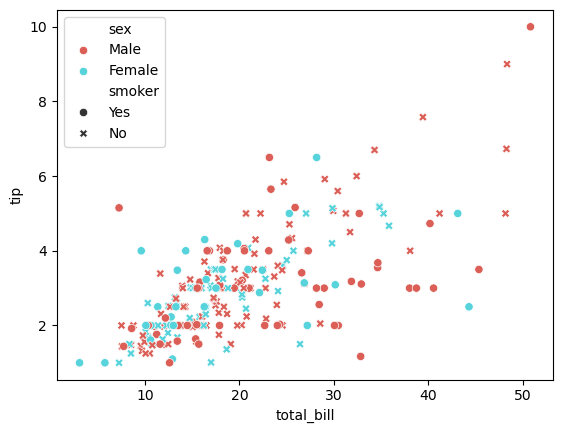

In [312]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df4, hue = 'sex', style = 'smoker',palette = 'hls')
plt.show()

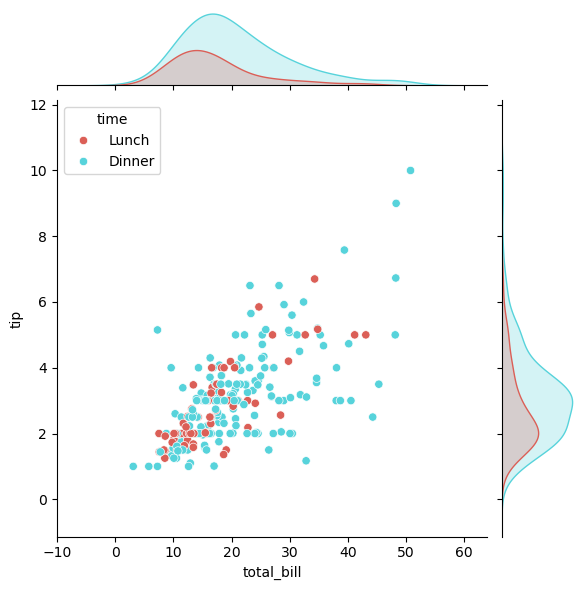

In [315]:
# Joint Plot. 
sns.jointplot(x = 'total_bill', y = 'tip', data = df4, hue = 'time', palette = 'hls')
plt.show()

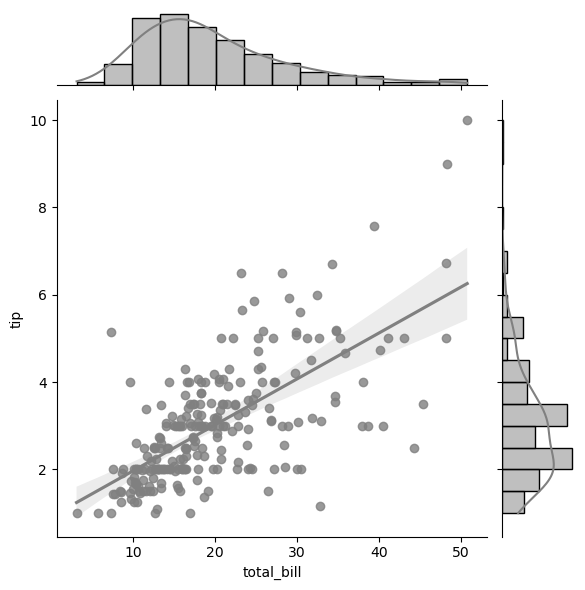

In [320]:
# Joint Plot. 
sns.jointplot(x = 'total_bill', y = 'tip', data = df4, kind = 'reg', color = 'grey')
plt.show()

In [323]:
corr = df4.corr(numeric_only = True)

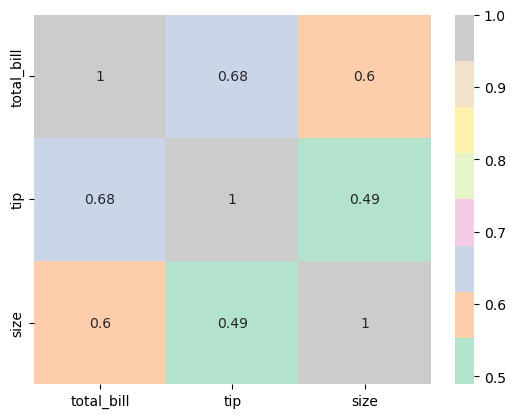

In [325]:
sns.heatmap(corr, cmap = 'Pastel2', annot = True)
plt.show()

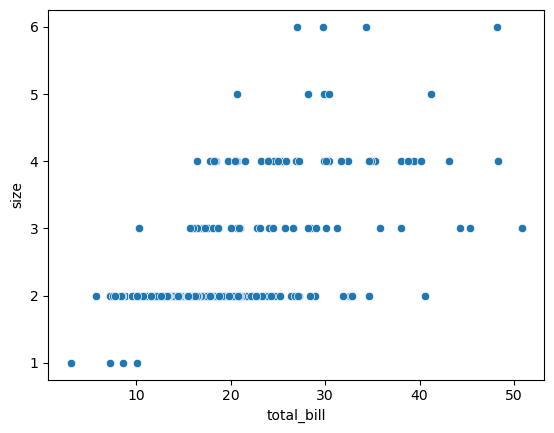

In [327]:
sns.scatterplot(x = 'total_bill', y = 'size', data = df4)
plt.show()